In [315]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
from IPython.display import Audio
import seaborn as sns

## Set base dir

In [4]:
os.chdir('/staging/leuven/stg_00055/projects/ASAP/Multiome/CellRanger_gut/29062022_multiome/29-06-2022_ARC/')

## Set pandas printing options

In [ ]:
def set_pandas_display_options():
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed

set_pandas_display_options()

## Set input and output folders

In [58]:
input_matrices_path='matrices/'
outDir='MOC15_pool1_scanpy_results/'

if not os.path.exists(outDir):
    os.makedirs(outDir)

## Set values for metadata

In [18]:
samples=os.listdir(input_matrices_path)
conditions=[i.split('_')[1] for i in samples]
MOC=[i.split('_')[0] for i in samples]

## Read matrices

In [24]:
adatas = []
for i in range(len(samples)):
    adata = sc.read_10x_mtx(input_matrices_path+samples[i], var_names = 'gene_symbols', cache=True)
    adata.obs['sample'] = samples[i]
    adata.obs['Condition'] = conditions[i]
    adata.obs['MOC'] = MOC[i]
    adata.obs.set_index(adata.obs.index.astype(str)+ '_' +samples[i]  , inplace=True)
    adatas.append(adata)

## Concatenate matrices

In [30]:
adata = adatas[0]
for adata_sub in adatas[1:]:
    adata = adata.concatenate(adata_sub, index_unique=None)

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [61]:
adata.obs

,sample,Condition,MOC,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACAGCCAAACCTAT-1_MOC15_P_pool1A,MOC15_P_pool1A,P,MOC15,0,4553,8.423761,12782.0,9.455872,22.453450,27.483962,34.431231,47.613832
AAACAGCCAATCCTGA-1_MOC15_P_pool1A,MOC15_P_pool1A,P,MOC15,0,1228,7.113956,1611.0,7.385231,15.828678,22.718808,35.133457,54.810677
AAACAGCCACAATGCC-1_MOC15_P_pool1A,MOC15_P_pool1A,P,MOC15,0,665,6.501290,825.0,6.716595,21.939394,31.515152,43.636364,80.000000
AAACAGCCACAGCCTG-1_MOC15_P_pool1A,MOC15_P_pool1A,P,MOC15,0,3348,8.116417,8622.0,9.062188,31.489214,35.966133,42.577128,55.532359
AAACAGCCAGCAGGTA-1_MOC15_P_pool1A,MOC15_P_pool1A,P,MOC15,0,739,6.606650,941.0,6.848005,19.553666,30.180659,42.720510,74.601488
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTAAGTGT-1_MOC15_P_pool1C,MOC15_P_pool1C,P,MOC15,1,1602,7.379632,2822.0,7.945556,30.049610,35.790220,44.401134,60.949681
TTTGTTGGTTAGAGGG-1_MOC15_P_pool1C,MOC15_P_pool1C,P,MOC15,1,281,5.641907,332.0,5.808143,30.421687,45.481928,75.602410,100.000000
TTTGTTGGTTAGGCTA-1_MOC15_P_pool1C,MOC15_P_pool1C,P,MOC15,1,3104,8.040769,6873.0,8.835502,21.649935,27.746253,35.864979,51.083952
TTTGTTGGTTGGGTTA-1_MOC15_P_pool1C,MOC15_P_pool1C,P,MOC15,1,3493,8.158802,7354.0,8.903135,15.134621,20.437857,28.447104,44.302420


## Calculate metrics

In [52]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

## Add MT counts

In [ ]:
adata.var["mt"] = adata.var_names.str.startswith(
    "MT-"
)  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

## Save merged object

In [59]:
name='MOC15_pool1_merged.hdf5'
adata.write(outDir+name)

## View some metrics

In [105]:
print("CELL COUNTS")
cell_counts=(adata.obs['sample'].value_counts().sort_index())
print(cell_counts)
print("\nMEAN GENE COUNTS")
print(adata.obs.groupby('sample')['n_genes_by_counts'].mean().sort_values(ascending=False))
print("\nMEAN UMI COUNTS")
print(adata.obs.groupby('sample')['total_counts'].mean().sort_values(ascending=False))
print("\nMEAN MT%")
print(adata.obs.groupby('sample')['pct_counts_mt'].mean().sort_values(ascending=False))

CELL COUNTS
MOC15_P_pool1A    7055
MOC15_P_pool1B    9963
MOC15_P_pool1C    8423
Name: sample, dtype: int64

MEAN GENE COUNTS
sample
MOC15_P_pool1B    1713.695373
MOC15_P_pool1A    1446.729979
MOC15_P_pool1C    1430.381693
Name: n_genes_by_counts, dtype: float64

MEAN UMI COUNTS
sample
MOC15_P_pool1B    2898.426270
MOC15_P_pool1A    2305.505371
MOC15_P_pool1C    2235.280518
Name: total_counts, dtype: float32

MEAN MT%
sample
MOC15_P_pool1C    4.548557
MOC15_P_pool1A    4.215242
MOC15_P_pool1B    3.931468
Name: pct_counts_mt, dtype: float32


## Plot metrics

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


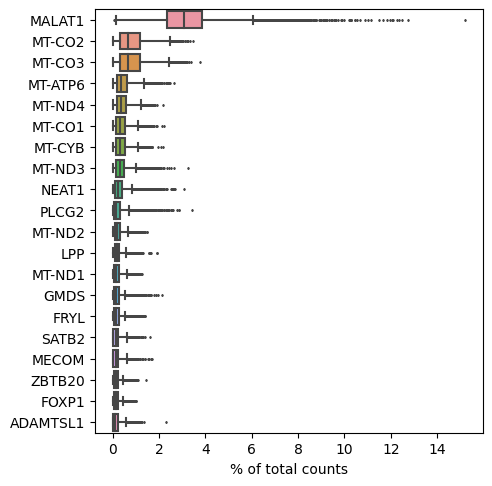

In [127]:
sc.pl.highest_expr_genes(adata, n_top=20, )

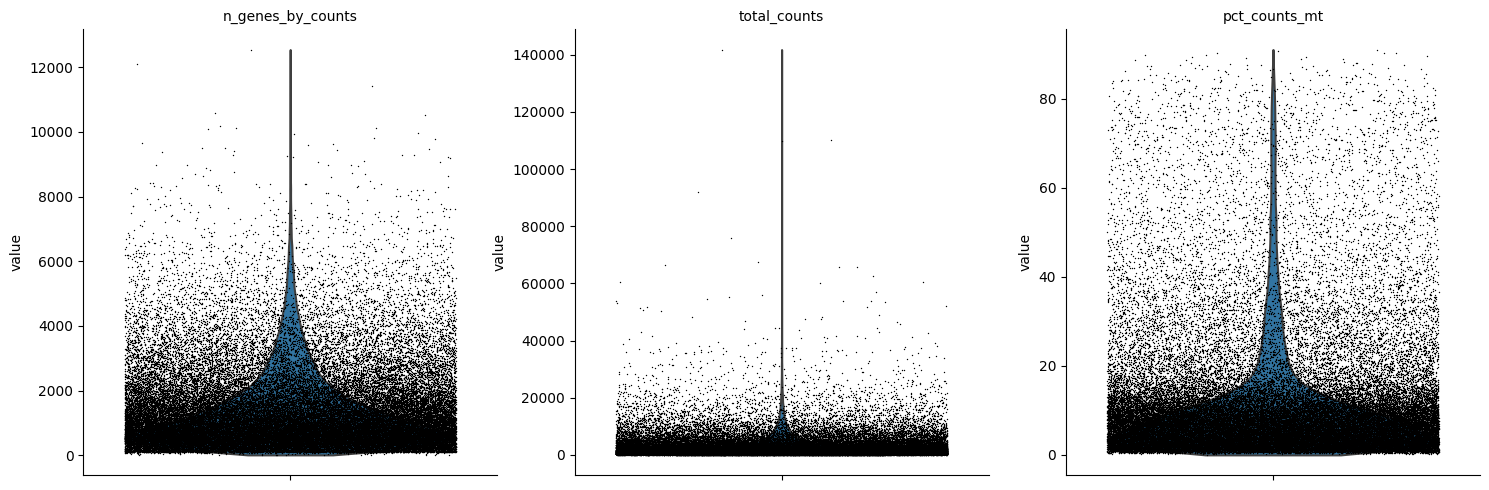

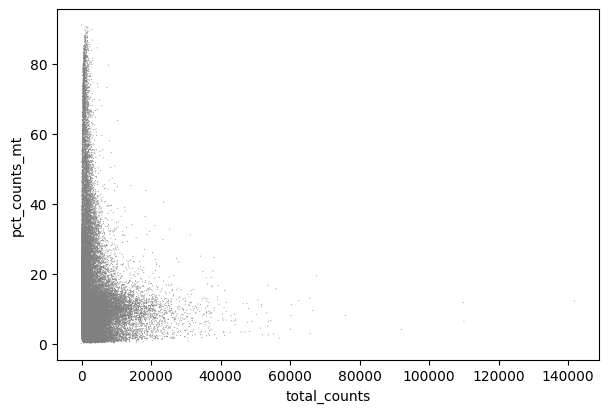

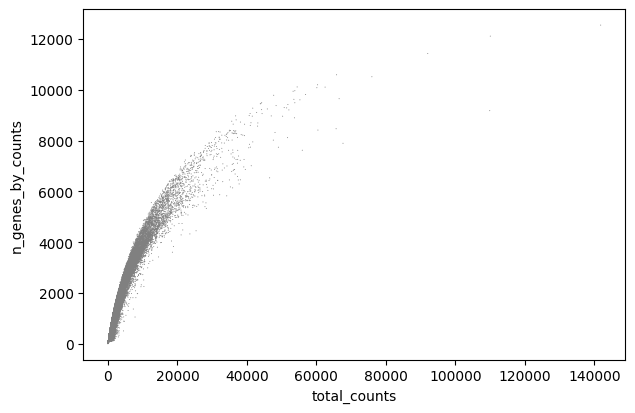

In [85]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

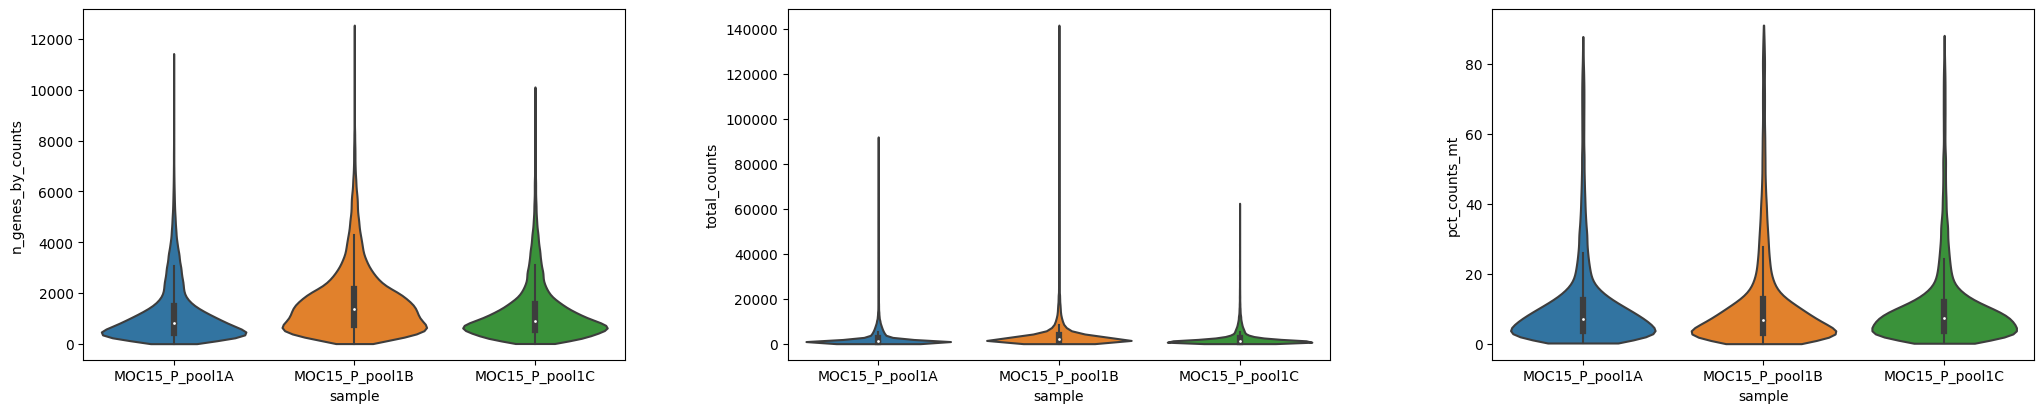

In [96]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],groupby='sample',
     inner='box', stripplot=False,
    multi_panel=True,
)

## Do filtering

In [98]:
sc.pp.filter_cells(adata, min_genes=700)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_genes(adata, min_counts=3)

In [99]:
adata = adata[adata.obs.n_genes_by_counts < 10000, :]
adata = adata[adata.obs.total_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

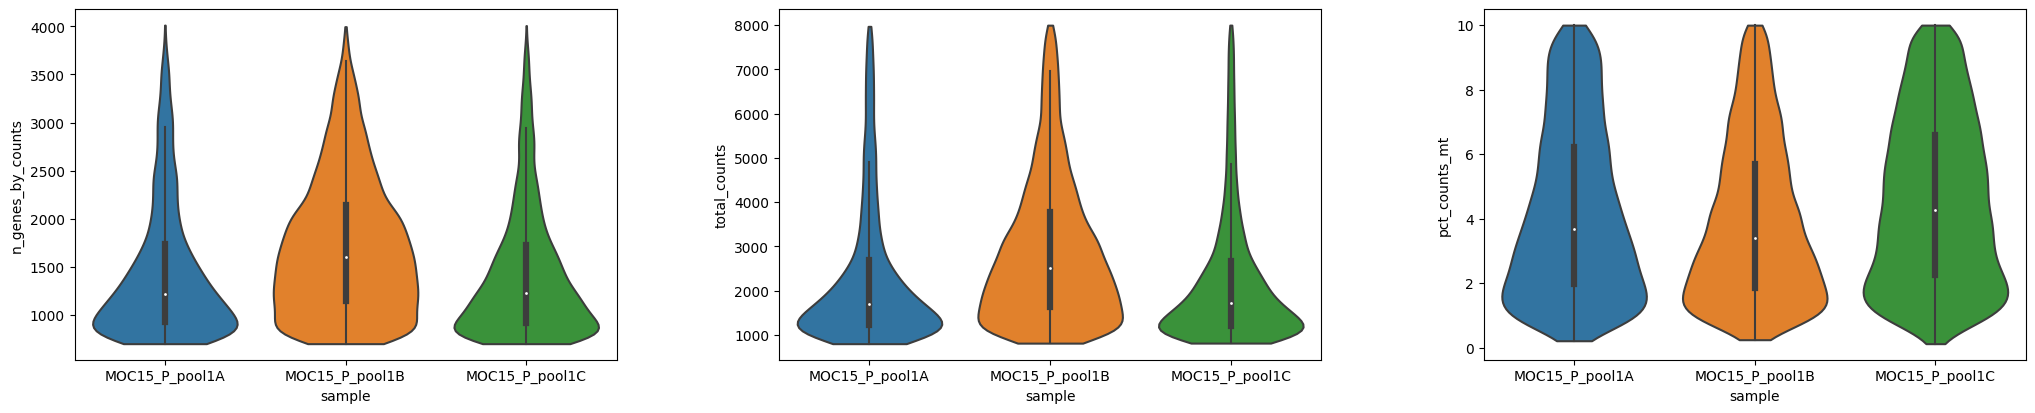

In [101]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],groupby='sample',
     inner='box', stripplot=False,
    multi_panel=True,
)

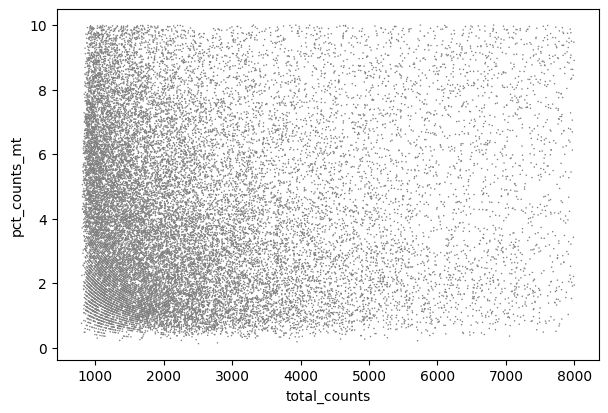

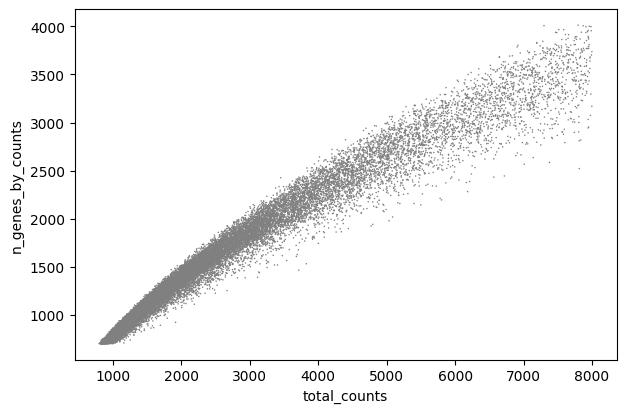

In [102]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [110]:
counts_postfilter = adata.obs['sample'].value_counts()
print(counts_postfilter)
print('\nCells removed:\n', 1-(counts_postfilter/cell_counts))

MOC15_P_pool1B    9963
MOC15_P_pool1C    8423
MOC15_P_pool1A    7055
Name: sample, dtype: int64

Cells removed:
 MOC15_P_pool1A    0.0
MOC15_P_pool1B    0.0
MOC15_P_pool1C    0.0
Name: sample, dtype: float64


## Doublet removal with scrublet

In [122]:
sc.external.pp.scrublet(adata, threshold=0.25,expected_doublet_rate=0.1)

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Detected doublet rate = 9.9%
Estimated detectable doublet fraction = 34.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 29.2%


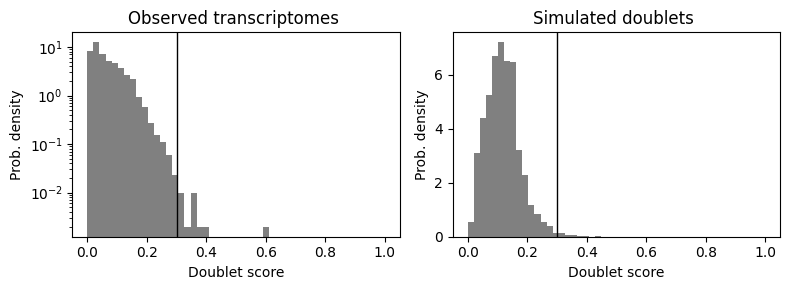

In [119]:
sc.external.pl.scrublet_score_distribution(adata)

In [123]:
adata.obs[adata.obs["predicted_doublet"] == True].shape

(2522, 17)

In [124]:
adata = adata[adata.obs["predicted_doublet"] == False]

## Save QC object

In [126]:
name='MOC15_pool1_merged_QC.hdf5'
adata.write(outDir+name)

In [272]:
adata=sc.read_h5ad(outDir+'MOC15_pool1_merged_QC.hdf5')

## Normalization

In [273]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

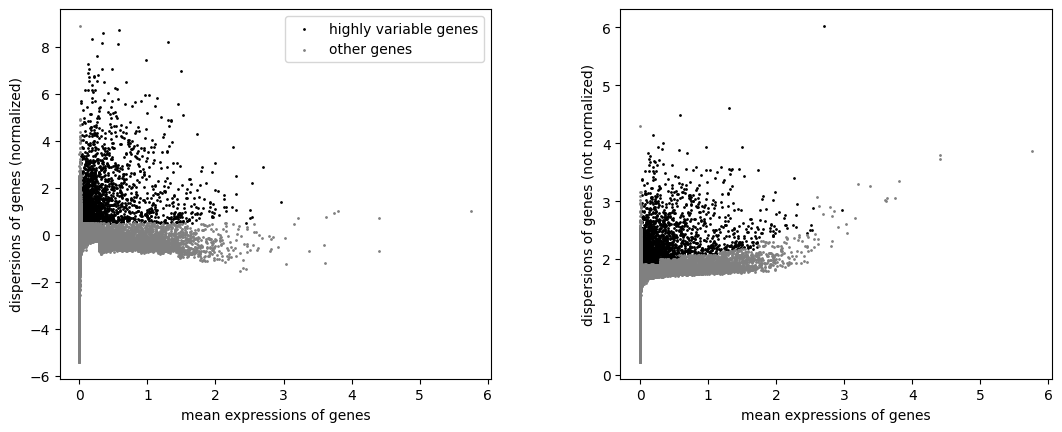

In [274]:
sc.pp.highly_variable_genes(adata, min_mean=0.021, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [275]:
adata.var[adata.var["highly_variable"]==True] 

,gene_ids,feature_types,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mt,n_cells,n_counts,highly_variable,means,dispersions,dispersions_norm
ISG15,ENSG00000187608,Gene Expression,12954,0.491399,0.399715,78.323293,29366.0,10.287627,False,10058,26142.0,True,0.833957,2.211901,0.967561
PRDM16,ENSG00000142611,Gene Expression,607,0.011965,0.011894,98.984270,715.0,6.573680,False,533,638.0,True,0.064080,2.347180,2.043669
KCNAB2,ENSG00000069424,Gene Expression,4173,0.099582,0.094930,93.017068,5951.0,8.691483,False,3878,5643.0,True,0.207315,1.934850,0.592872
GPR153,ENSG00000158292,Gene Expression,614,0.011128,0.011066,98.972557,665.0,6.501290,False,547,596.0,True,0.056717,1.908899,0.501564
PER3,ENSG00000049246,Gene Expression,2111,0.042319,0.041448,96.467537,2529.0,7.835975,False,1900,2308.0,True,0.188374,2.035437,0.946792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLIC2,ENSG00000155962,Gene Expression,2176,0.046787,0.045726,96.358768,2796.0,7.936303,False,1933,2529.0,True,0.210428,2.198700,1.521237
PCDH11Y,ENSG00000099715,Gene Expression,1208,0.033601,0.033049,97.978581,2008.0,7.605392,False,990,1743.0,True,0.209598,2.895995,3.974686
TBL1Y,ENSG00000092377,Gene Expression,976,0.018842,0.018667,98.366801,1126.0,7.027315,False,913,1060.0,True,0.096215,1.914250,0.520393
NLGN4Y,ENSG00000165246,Gene Expression,2090,0.045499,0.044494,96.502677,2719.0,7.908387,False,1855,2465.0,True,0.251746,2.160075,1.385332


## Regress out variables scale and save raw instance

In [ ]:
#sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

In [278]:
adata.raw = adata

In [279]:
sc.pp.scale(adata, max_value=10)

## PCA

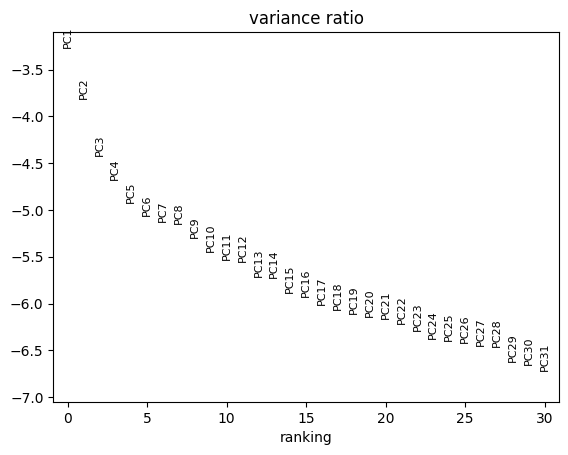

In [156]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

## Plot genes that contribute to the PCs

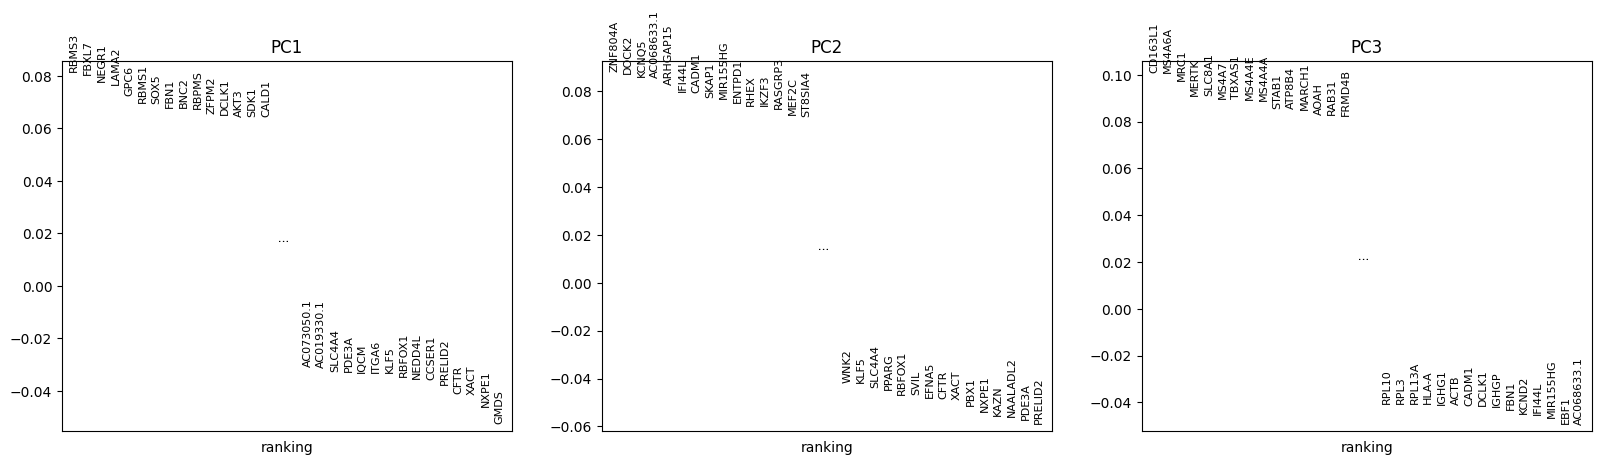

In [169]:
sc.pl.pca_loadings(adata)

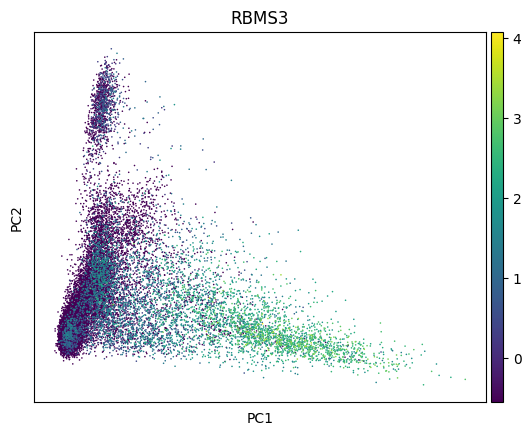

In [196]:
sc.pl.pca(adata, color='RBMS3')


## UMAP and tSNE

In [ ]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

In [159]:
res = [0.2,0.4,0.6,0.8,1.0,1.2]
for i in res:
    sc.tl.leiden(adata, resolution=i, key_added="leiden_" + str(i))

In [178]:
sc.tl.umap(adata,n_pcs=30 )
sc.tl.tsne(adata,n_pcs=30)

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [ ]:
sc.pl.umap(adata, color="leiden_" + str(0.6))

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


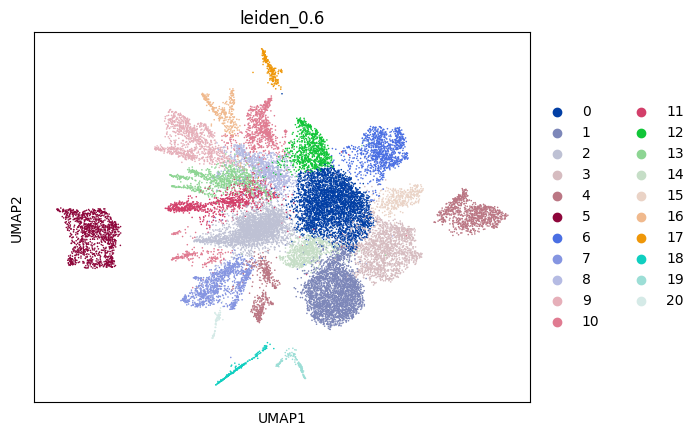

In [220]:
sc.pl.umap(adata, color="leiden_0.6")

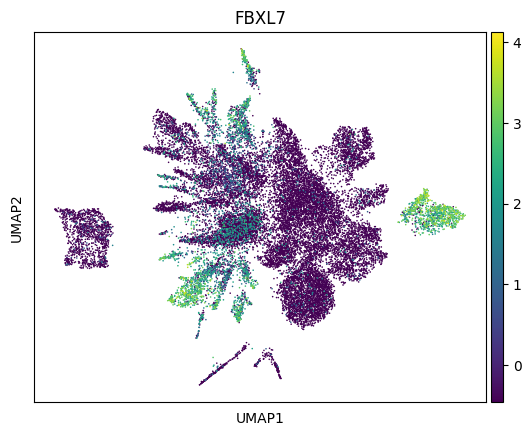

In [201]:
sc.pl.umap(adata, color="FBXL7")

## Integration with Harmony

In [285]:
sc.external.pp.harmony_integrate(adata, key='sample',basis='X_pca',adjusted_basis='X_pca_harmony')

2022-12-14 16:46:20,253 - harmonypy - INFO - Iteration 1 of 10
2022-12-14 16:46:35,570 - harmonypy - INFO - Iteration 2 of 10
2022-12-14 16:46:54,800 - harmonypy - INFO - Iteration 3 of 10
2022-12-14 16:47:11,607 - harmonypy - INFO - Iteration 4 of 10
2022-12-14 16:47:31,765 - harmonypy - INFO - Iteration 5 of 10
2022-12-14 16:47:50,534 - harmonypy - INFO - Iteration 6 of 10
2022-12-14 16:48:08,840 - harmonypy - INFO - Iteration 7 of 10
2022-12-14 16:48:23,156 - harmonypy - INFO - Iteration 8 of 10
2022-12-14 16:48:30,946 - harmonypy - INFO - Iteration 9 of 10
2022-12-14 16:48:40,617 - harmonypy - INFO - Iteration 10 of 10
2022-12-14 16:48:46,216 - harmonypy - INFO - Converged after 10 iterations


In [286]:
adata.obsm['X_pca_harmony'].shape

(22919, 50)

In [287]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20,use_rep='X_pca_harmony',key_added='harmony')

In [288]:
res = [0.5]#0.4,0.6,0.8,1.0,1.2]
for i in res:
    sc.tl.leiden(adata, resolution=i, key_added="Harmony_leiden_" + str(i),neighbors_key='harmony')

In [289]:
sc.tl.umap(adata,neighbors_key= 'harmony')
#sc.tl.tsne(adata,n_pcs=30,neighbors_key= 'harmony')

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


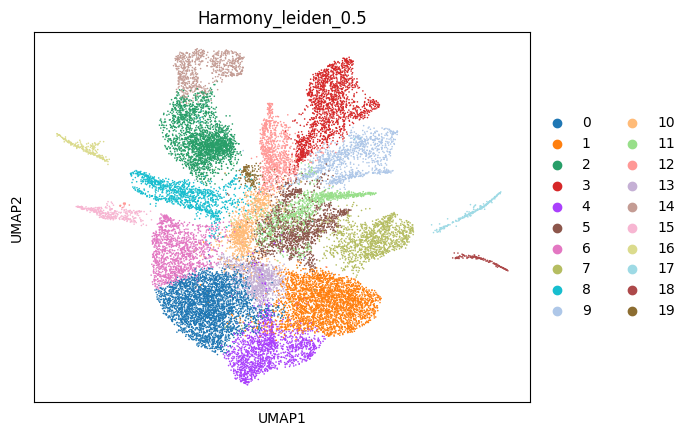

In [290]:
sc.pl.umap(adata, color="Harmony_leiden_0.5")

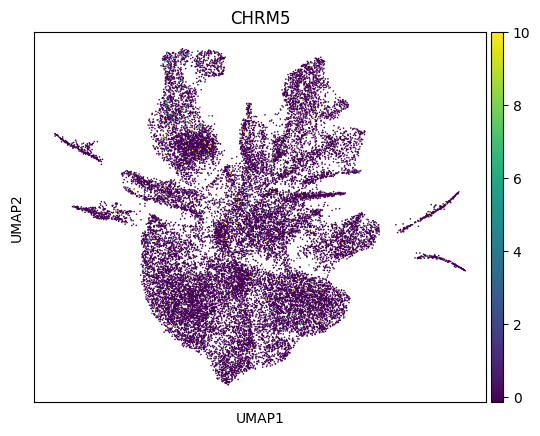

In [305]:
sc.pl.umap(adata, color="CHRM5")

In [330]:
umap_coords=pd.DataFrame(adata.obsm['X_umap'], )
umap_coords.columns=['UMAP1','UMAP2']
umap_coords['sample']=adata.obs['sample'].tolist()

<AxesSubplot: xlabel='UMAP1', ylabel='UMAP2'>

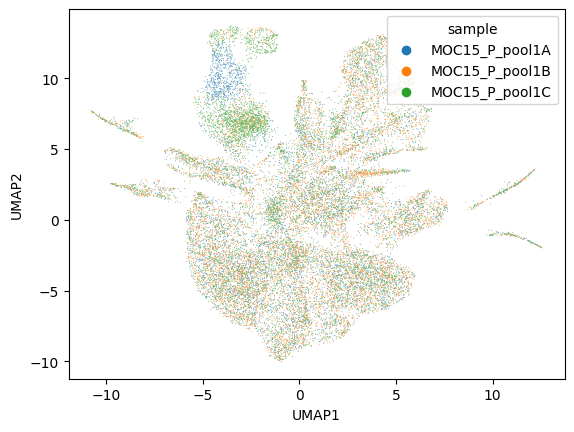

In [339]:
sns.scatterplot(umap_coords, x= 'UMAP1', y='UMAP2',hue='sample',s=0.4)

## Save analyzed data

In [202]:
name='MOC15_pool1_merged_analyzed.hdf5'
adata.write(outDir+name)

## Subsetting based on cluster

In [218]:
adata_new = adata[~adata.obs['leiden_0.6'].isin(['10']),:] ##remove cluster 10
#adata_new = adata[adata.obs['leiden_0.6'].isin(['10']),:] ##keep cluster 10

## Find markers for each cluster

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


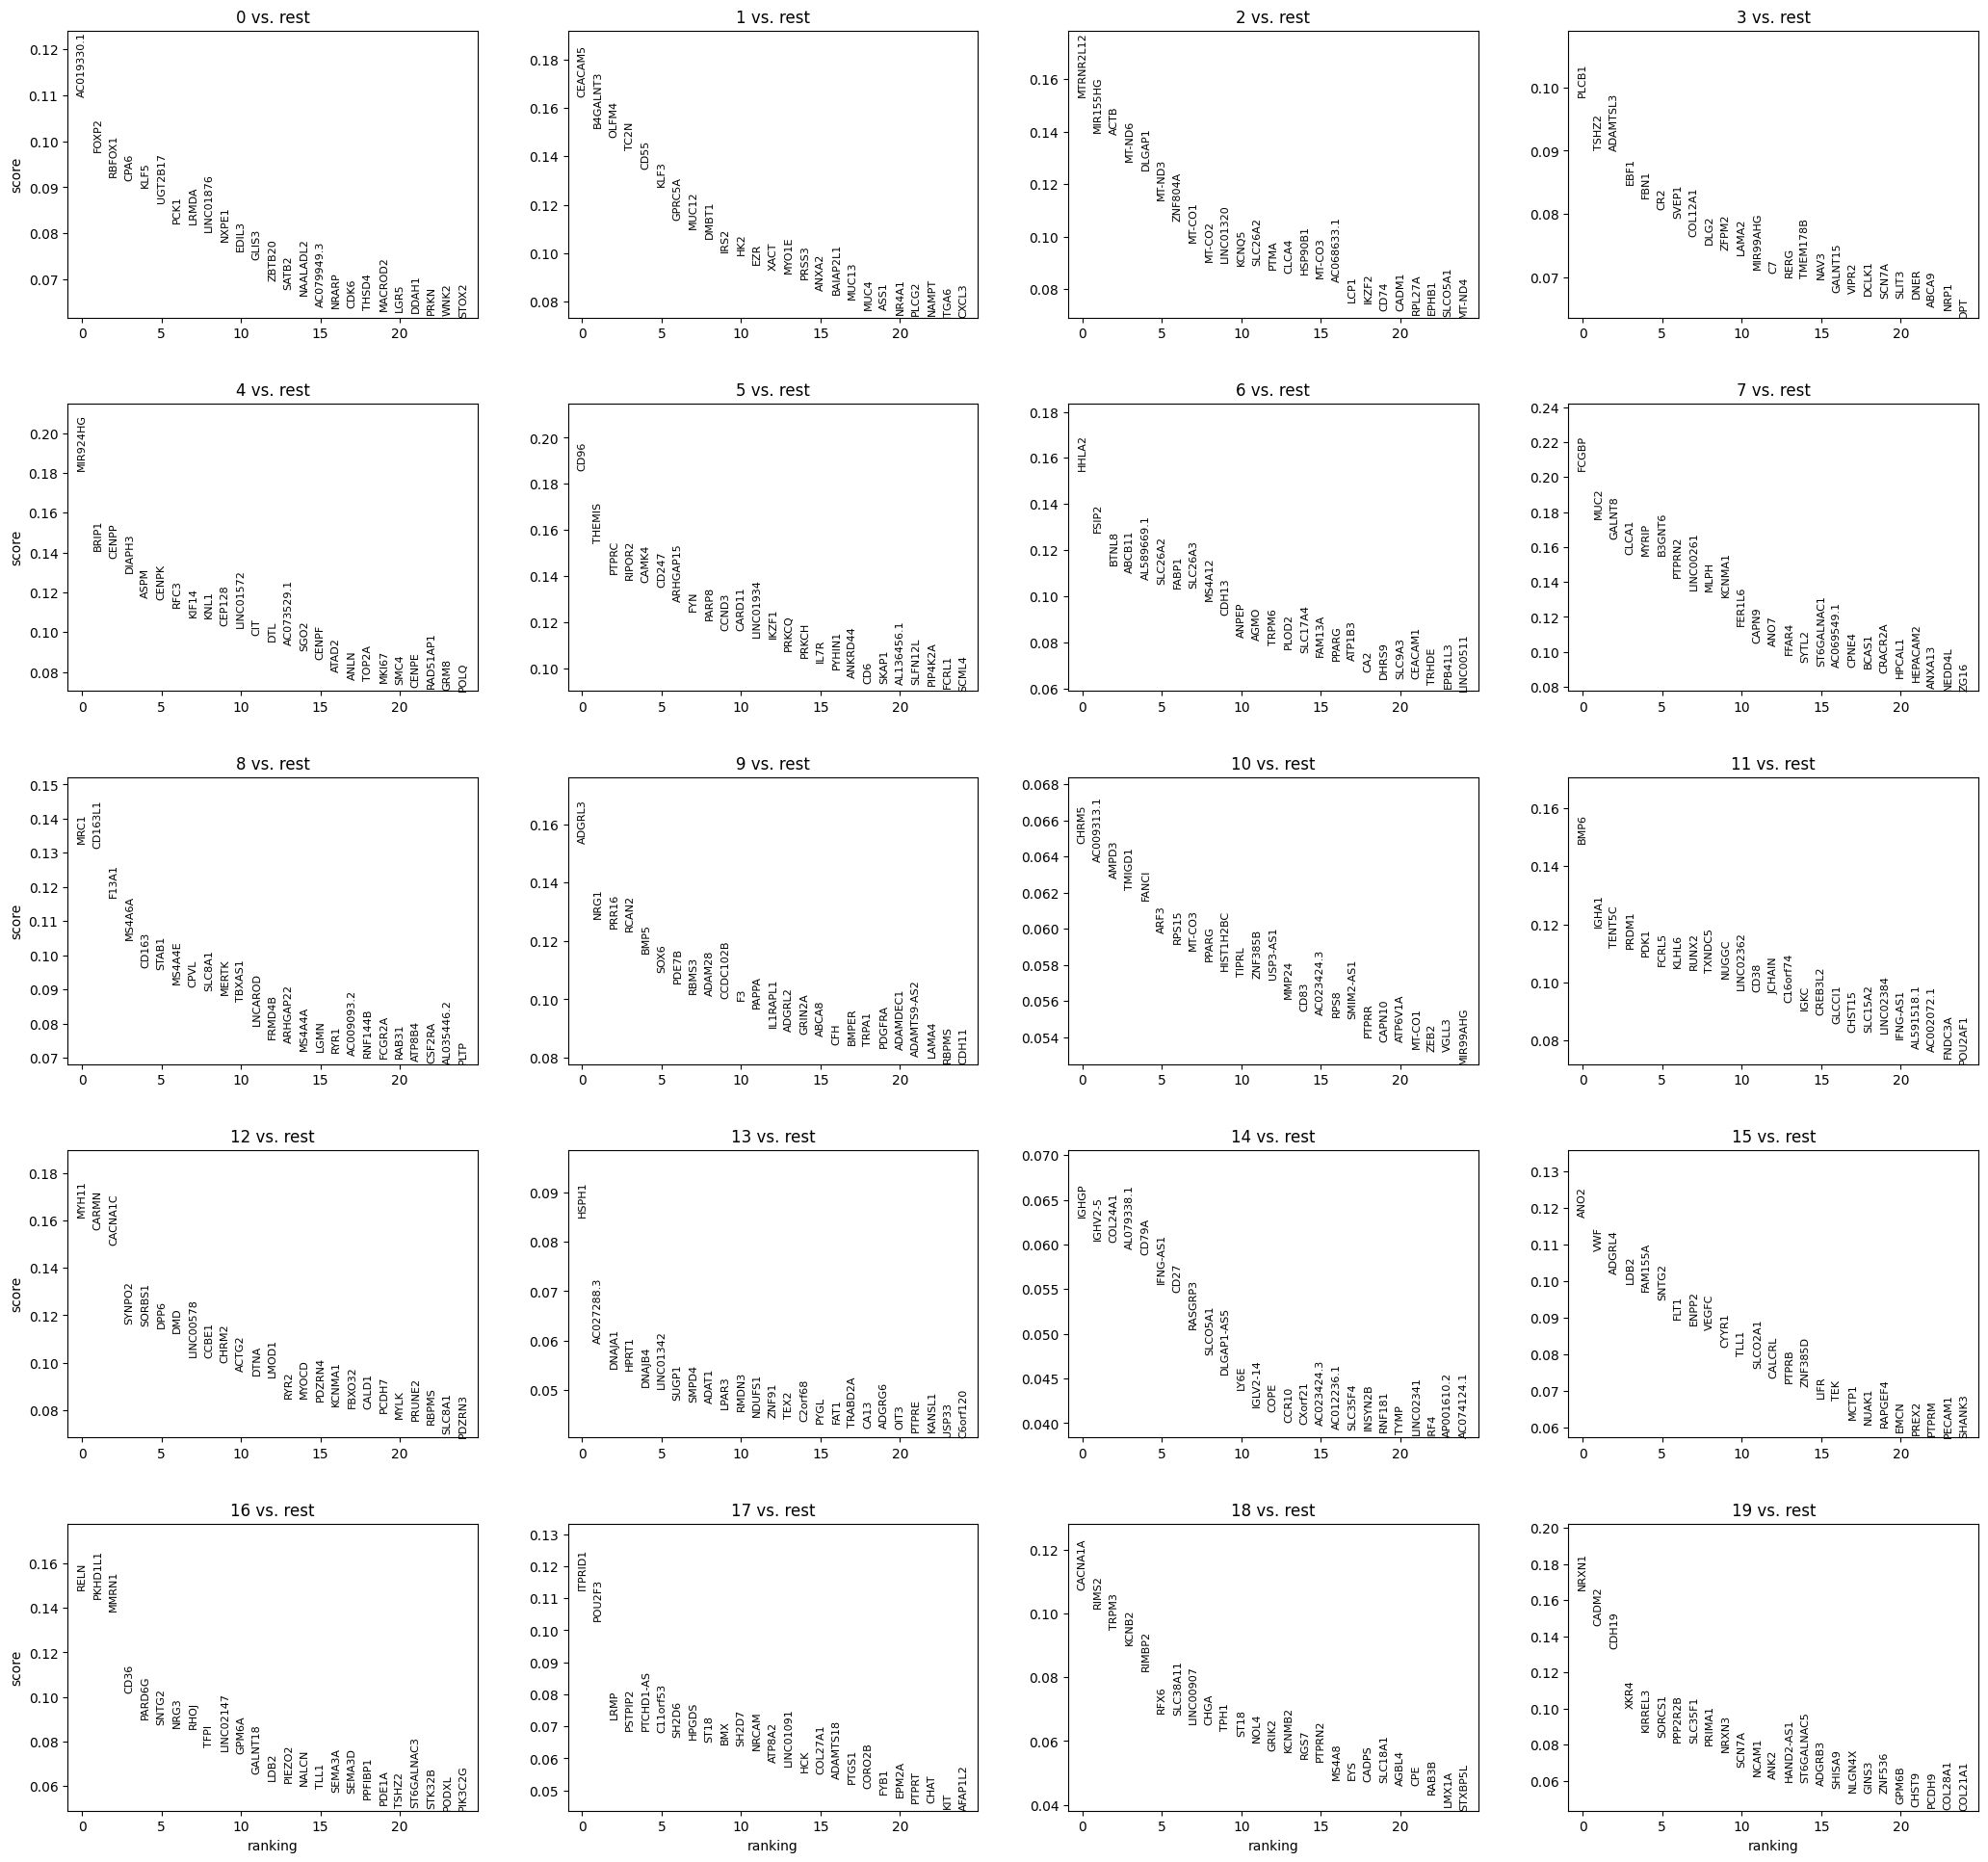

In [292]:
sc.tl.rank_genes_groups(adata, groupby="Harmony_leiden_0.5", method="logreg")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
markers = pd.DataFrame.from_records(adata.uns["rank_genes_groups"]["names"])

In [294]:
markers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,AC019330.1,CEACAM5,MTRNR2L12,PLCB1,MIR924HG,CD96,HHLA2,FCGBP,MRC1,ADGRL3,CHRM5,BMP6,MYH11,HSPH1,IGHGP,ANO2,RELN,ITPRID1,CACNA1A,NRXN1
1,FOXP2,B4GALNT3,MIR155HG,TSHZ2,BRIP1,THEMIS,FSIP2,MUC2,CD163L1,NRG1,AC009313.1,IGHA1,CARMN,AC027288.3,IGHV2-5,VWF,PKHD1L1,POU2F3,RIMS2,CADM2
2,RBFOX1,OLFM4,ACTB,ADAMTSL3,CENPP,PTPRC,BTNL8,GALNT8,F13A1,PRR16,AMPD3,TENT5C,CACNA1C,DNAJA1,COL24A1,ADGRL4,MMRN1,LRMP,TRPM3,CDH19
3,CPA6,TC2N,MT-ND6,EBF1,DIAPH3,RIPOR2,ABCB11,CLCA1,MS4A6A,RCAN2,TMIGD1,PRDM1,SYNPO2,HPRT1,AL079338.1,LDB2,CD36,PSTPIP2,KCNB2,XKR4
4,KLF5,CD55,DLGAP1,FBN1,ASPM,CAMK4,AL589669.1,MYRIP,CD163,BMP5,FANCI,PDK1,SORBS1,DNAJB4,CD79A,FAM155A,PARD6G,PTCHD1-AS,RIMBP2,KIRREL3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31548,HHLA2,CENPP,RALGAPB,ADAM28,PRKCH,ARHGAP6,PRKAG2,NAALADL2,MARCH3,EBF1,COMTD1,PTPRN2,MED25,MT-ATP6,KIF2C,PRKG1,ENPP2,AC025580.2,POF1B,GPHN
31549,FABP1,ARHGAP15,MRPL9,SGIP1,AC019330.1,DST,LRMDA,MAML2,CENPE,CACNA1C,RPS3A,STON1-GTF2A1L,CLN8,CD55,ASPM,DLGAP2,MYRIP,THSD4,TSPAN8,ACVR1C
31550,BTNL8,AP3B1,PADI2,HPSE2,BTBD9,DOCK4,WNK2,PCSK5,NCAM1,SCN7A,CYB5R4,KCNMA1,AL162414.1,MT-CO3,ARHGAP11A,CFTR,MALAT1,ADAMTSL1,ADAMTSL1,MT-ND4L
31551,CD55,ITPR2,GNAI2,RCAN2,MAN1A1,MRC1,RBFOX1,ADAMTSL1,RBMS3,SORBS1,RPL18,CLCA1,SORCS1,LINC01876,AC122697.1,PARD6G,FLT1,PDE3A,NXPE1,RANBP17


/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


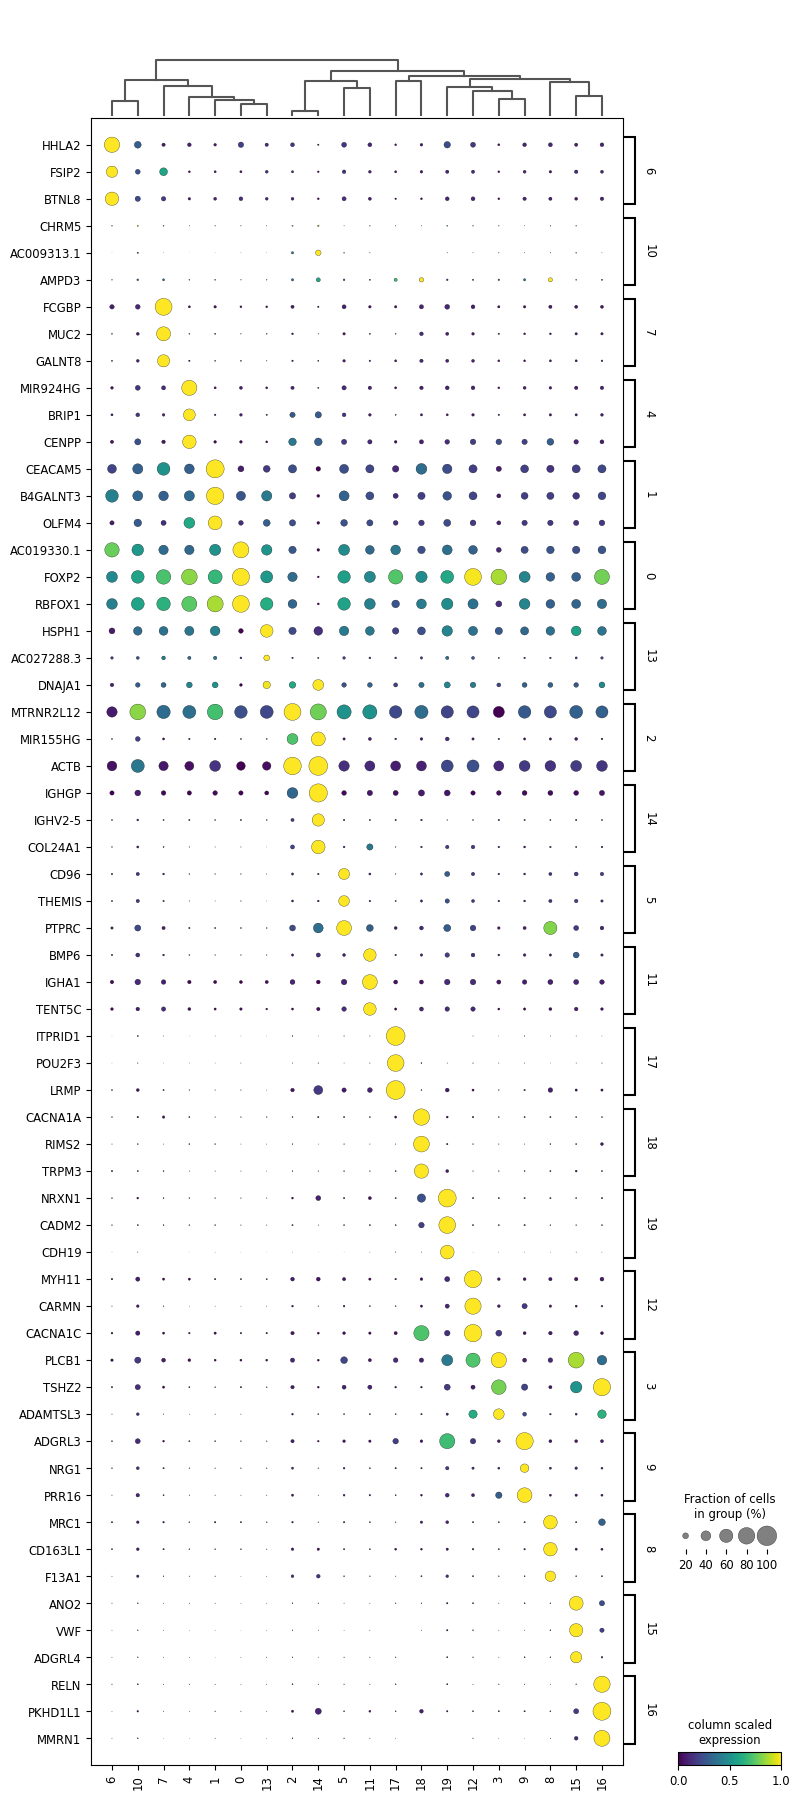

In [300]:
ngenes = 3
mdict = markers.iloc[0:ngenes].to_dict("list")
sc.tl.dendrogram(adata, groupby="Harmony_leiden_0.5")
sc.pl.dotplot(
    adata,
    mdict,
    "Harmony_leiden_0.5",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    cmap="viridis",
    dendrogram=True,
    # save="cluster_markergenes_dotplot_3genes.svg",
    swap_axes=True,
)

In [302]:
mdict

{'0': ['AC019330.1', 'FOXP2', 'RBFOX1'],
 '1': ['CEACAM5', 'B4GALNT3', 'OLFM4'],
 '2': ['MTRNR2L12', 'MIR155HG', 'ACTB'],
 '3': ['PLCB1', 'TSHZ2', 'ADAMTSL3'],
 '4': ['MIR924HG', 'BRIP1', 'CENPP'],
 '5': ['CD96', 'THEMIS', 'PTPRC'],
 '6': ['HHLA2', 'FSIP2', 'BTNL8'],
 '7': ['FCGBP', 'MUC2', 'GALNT8'],
 '8': ['MRC1', 'CD163L1', 'F13A1'],
 '9': ['ADGRL3', 'NRG1', 'PRR16'],
 '10': ['CHRM5', 'AC009313.1', 'AMPD3'],
 '11': ['BMP6', 'IGHA1', 'TENT5C'],
 '12': ['MYH11', 'CARMN', 'CACNA1C'],
 '13': ['HSPH1', 'AC027288.3', 'DNAJA1'],
 '14': ['IGHGP', 'IGHV2-5', 'COL24A1'],
 '15': ['ANO2', 'VWF', 'ADGRL4'],
 '16': ['RELN', 'PKHD1L1', 'MMRN1'],
 '17': ['ITPRID1', 'POU2F3', 'LRMP'],
 '18': ['CACNA1A', 'RIMS2', 'TRPM3'],
 '19': ['NRXN1', 'CADM2', 'CDH19']}

/data/leuven/343/vsc34389/jupyter/envs/pycisTopic/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


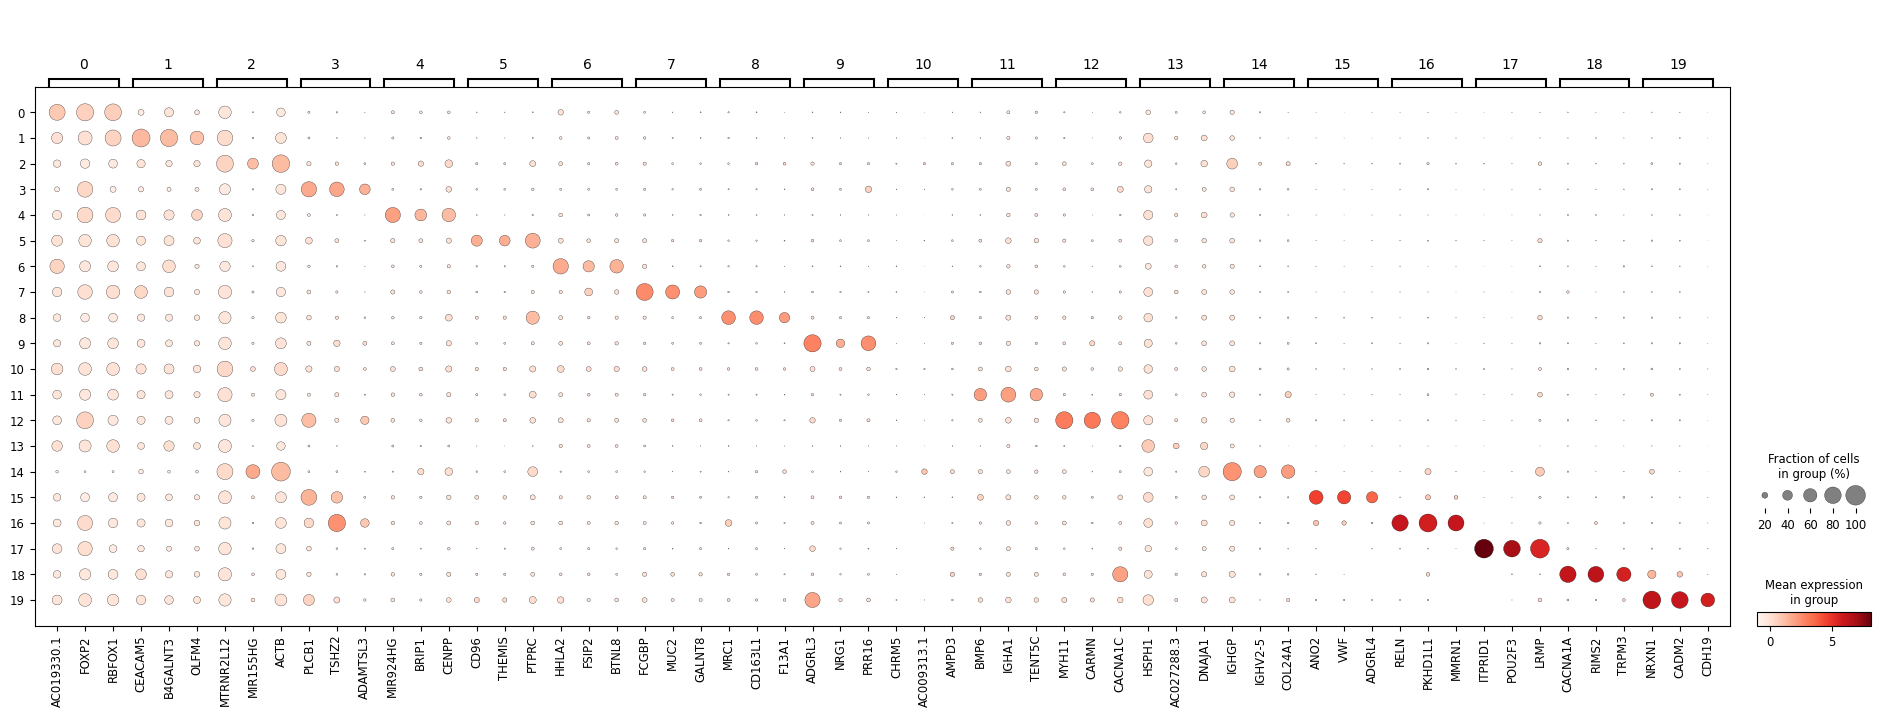

In [304]:
sc.pl.dotplot(adata, mdict, groupby="Harmony_leiden_0.5")